In [538]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

__У нас есть 2 датасета с данными:__

1) датасет с imdb c информацией о 10000 фильмов


2) датасет из Кинопоиска с 3000 фильмами (в дальнейшем планируем запарсить больше данных)

## Шаг 3: Предварительная обработка данных

### Посмотрим на 1 датасет

In [539]:
df_imdb = pd.read_csv('IMDB.csv', sep=',', index_col=0)
df_imdb

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
0,Железный человек,2008,126,"['Action', 'Adventure', 'Sci-Fi']",7.9,1080097,12+,79,318412101
1,Звёздные войны. Эпизод 6: Возвращение джедая,1983,131,"['Action', 'Adventure', 'Fantasy']",8.3,1075244,0+,58,309125409
2,Вверх,2009,96,"['Animation', 'Adventure', 'Comedy']",8.3,1066875,0+,88,293004164
3,Дэдпул,2016,108,"['Action', 'Comedy']",8.0,1064946,18+,65,363070709
4,В поисках Немо,2003,100,"['Animation', 'Adventure', 'Comedy']",8.2,1064301,0+,90,380843261
...,...,...,...,...,...,...,...,...,...
14992,Терминатор 2: Судный день,1991,137,"['Action', 'Sci-Fi']",8.6,1120808,16+,75,204843350
14993,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
14994,Шоу Трумана,1998,103,"['Comedy', 'Drama']",8.2,1113885,0+,90,125618201
14995,Подозрительные лица,1995,106,"['Crime', 'Drama', 'Mystery']",8.5,1102596,16+,77,23341568


 __Описание колонок:__

- `title` — название фильма
- `year` — дата релиза
- `runtime`  — длительность фильма
- `genre` — жанры фильма
- `imdb_rating` — IMDb рейтинг фильма
- `votes` — количество поставленных оценок фильму
- `certificate` — возрастное ограничение фильма
- `metascore` — рейтинг, на основе отзывов кинокритиков на сайте Metacritic.com
- `gross` — мировые сборы фильма

Посмотрим, какие типы данных содержат наши столбцы

In [540]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14997 entries, 0 to 14996
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        14997 non-null  object 
 1   year         14997 non-null  int64  
 2   runtime      14997 non-null  int64  
 3   genre        14997 non-null  object 
 4   imdb_rating  14997 non-null  float64
 5   votes        14997 non-null  int64  
 6   certificate  12325 non-null  object 
 7   metascore    14997 non-null  int64  
 8   gross        14997 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.1+ MB


Заметим, что в колонке 'certifucate' встречаются NaN значения

Проверим, что в наших данных фильмы не дублируются

In [541]:
duplicates = df_imdb.duplicated(subset='title')
duplicates.sum()

5395

In [542]:
duplicates = df_imdb.loc[df_imdb.duplicated(subset='title'), :]
duplicates

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
402,Бэтмен,1989,126,"['Action', 'Adventure']",7.5,386457,NaN,69,251188924
510,Жизнь прекрасна,2011,100,"['Comedy', 'Drama', 'Romance']",7.6,335722,R,72,35014192
546,Красавица и чудовище,2017,129,"['Adventure', 'Family', 'Fantasy']",7.1,318267,16+,65,504014165
685,Аладдин,2019,128,"['Adventure', 'Comedy', 'Family']",6.9,274715,6+,53,355559216
743,Вспомнить всё,2012,118,"['Action', 'Adventure', 'Sci-Fi']",6.2,259472,12+,43,58877969
...,...,...,...,...,...,...,...,...,...
14992,Терминатор 2: Судный день,1991,137,"['Action', 'Sci-Fi']",8.6,1120808,16+,75,204843350
14993,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
14994,Шоу Трумана,1998,103,"['Comedy', 'Drama']",8.2,1113885,0+,90,125618201
14995,Подозрительные лица,1995,106,"['Crime', 'Drama', 'Mystery']",8.5,1102596,16+,77,23341568


По названию фильма нашлось 5395 дубликатов

Проверим, что это и правда дубликаты, а не просто фильмы с одинаковыми названиями:

In [543]:
df_imdb[df_imdb['title'] == 'Мстители: Война бесконечности']

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
9993,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
10043,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
10093,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
10143,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
10193,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
...,...,...,...,...,...,...,...,...,...
14793,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
14843,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
14893,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
14943,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482


In [544]:
df_imdb[df_imdb['title'] == 'Аладдин']

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
324,Аладдин,1992,90,"['Animation', 'Adventure', 'Comedy']",8.0,435177,NaN,86,217350219
685,Аладдин,2019,128,"['Adventure', 'Comedy', 'Family']",6.9,274715,6+,53,355559216


Кажется, и правда есть проблемы, но не со всеми фильмами. Некоторые повторяются только по названию

Попробуем проверять не только по названию, а еще по дате выхода и по длительности

In [545]:
duplicates_2 = df_imdb.duplicated(subset=['title', 'year', 'runtime'])
duplicates_2.sum()

5000

Удалим дубликаты из нашего датасета

In [546]:
df_imdb = df_imdb[~duplicates_2]
df_imdb

,title,year,runtime,genre,imdb_rating,votes,certificate,metascore,gross
0,Железный человек,2008,126,"['Action', 'Adventure', 'Sci-Fi']",7.9,1080097,12+,79,318412101
1,Звёздные войны. Эпизод 6: Возвращение джедая,1983,131,"['Action', 'Adventure', 'Fantasy']",8.3,1075244,0+,58,309125409
2,Вверх,2009,96,"['Animation', 'Adventure', 'Comedy']",8.3,1066875,0+,88,293004164
3,Дэдпул,2016,108,"['Action', 'Comedy']",8.0,1064946,18+,65,363070709
4,В поисках Немо,2003,100,"['Animation', 'Adventure', 'Comedy']",8.2,1064301,0+,90,380843261
...,...,...,...,...,...,...,...,...,...
9992,Терминатор 2: Судный день,1991,137,"['Action', 'Sci-Fi']",8.6,1120808,16+,75,204843350
9993,Мстители: Война бесконечности,2018,149,"['Action', 'Adventure', 'Sci-Fi']",8.4,1118710,16+,68,678815482
9994,Шоу Трумана,1998,103,"['Comedy', 'Drama']",8.2,1113885,0+,90,125618201
9995,Подозрительные лица,1995,106,"['Crime', 'Drama', 'Mystery']",8.5,1102596,16+,77,23341568


In [547]:
duplicates_3 = df_imdb.duplicated(subset=['title', 'year', 'runtime'])
duplicates_3.sum()

0

Ура, дубликатов нет

Посмотрим на характеристики наших данных

In [548]:
df_imdb.describe()

,year,runtime,imdb_rating,votes,metascore,gross
count,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9.997000e+03
mean,2001.654296,110.321196,6.602901,9.154766e+04,46.649195,2.918597e+07
std,18.151637,21.985429,1.010051,1.674533e+05,28.089170,5.978627e+07
min,1915.000000,45.000000,1.000000,1.053500e+04,0.000000,0.000000e+00
25%,1994.000000,95.000000,6.000000,1.755200e+04,30.000000,0.000000e+00
50%,2007.000000,106.000000,6.700000,3.470400e+04,52.000000,4.899194e+06
75%,2015.000000,120.000000,7.300000,8.985800e+04,68.000000,3.383320e+07
max,2023.000000,439.000000,9.300000,2.738580e+06,100.000000,9.366622e+08


Заметим, что минимальное значение для признаков metascore и gross равняется 0. Возможно данные по таким фильмам просто отсутсвуют. Посмотрим на эти данные поближе и решим, что будем с ними делать, позже

**Теперь разберемся со столбцом 'genre'**, так как сейчас в качестве значений у нас список жанров

In [549]:
df_imdb['genre']

0          ['Action', 'Adventure', 'Sci-Fi']
1         ['Action', 'Adventure', 'Fantasy']
2       ['Animation', 'Adventure', 'Comedy']
3                       ['Action', 'Comedy']
4       ['Animation', 'Adventure', 'Comedy']
                        ...                 
9992                    ['Action', 'Sci-Fi']
9993       ['Action', 'Adventure', 'Sci-Fi']
9994                     ['Comedy', 'Drama']
9995           ['Crime', 'Drama', 'Mystery']
9996     ['Animation', 'Adventure', 'Drama']
Name: genre, Length: 9997, dtype: object

In [550]:
df_imdb['genre_1'], df_imdb['genre_2'], df_imdb['genre_3'] = df_imdb['genre'].str.strip("[]").str.split(", ", 2).str

In [551]:
df_imdb['genre_1'] = df_imdb['genre_1'].str.strip("''")
df_imdb['genre_2'] = df_imdb['genre_2'].str.strip("''")
df_imdb['genre_3'] = df_imdb['genre_3'].str.strip("''")

 Метод str.strip("[]") удаляет квадратные скобки из значения в столбце 'genre', оставляя только список жанров в виде строки. Затем метод str.split(", ", 2) разбивает строку на отдельные элементы, используя запятую и пробел в качестве разделителя. Параметр 2 указывает, что нужно разбить строку на три части.

In [552]:
df_imdb.drop('genre', axis=1, inplace=True)

Посмотрим, сколько NaN появилось в новых столбцах (также помним, что пустые значения еще были в колонке 'certificate')

In [553]:
df_imdb.isna().sum()

title             0
year              0
runtime           0
imdb_rating       0
votes             0
certificate    2672
metascore         0
gross             0
genre_1           0
genre_2         809
genre_3        3326
dtype: int64

Для начала заполним все NaN пустой строкой и проверим, что пропусков не осталось

In [554]:
df_imdb = df_imdb.fillna('')
df_imdb.isna().sum()

title          0
year           0
runtime        0
imdb_rating    0
votes          0
certificate    0
metascore      0
gross          0
genre_1        0
genre_2        0
genre_3        0
dtype: int64

In [555]:
df_imdb

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,Железный человек,2008,126,7.9,1080097,12+,79,318412101,Action,Adventure,Sci-Fi
1,Звёздные войны. Эпизод 6: Возвращение джедая,1983,131,8.3,1075244,0+,58,309125409,Action,Adventure,Fantasy
2,Вверх,2009,96,8.3,1066875,0+,88,293004164,Animation,Adventure,Comedy
3,Дэдпул,2016,108,8.0,1064946,18+,65,363070709,Action,Comedy,
4,В поисках Немо,2003,100,8.2,1064301,0+,90,380843261,Animation,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
9992,Терминатор 2: Судный день,1991,137,8.6,1120808,16+,75,204843350,Action,Sci-Fi,
9993,Мстители: Война бесконечности,2018,149,8.4,1118710,16+,68,678815482,Action,Adventure,Sci-Fi
9994,Шоу Трумана,1998,103,8.2,1113885,0+,90,125618201,Comedy,Drama,
9995,Подозрительные лица,1995,106,8.5,1102596,16+,77,23341568,Crime,Drama,Mystery


**Посмотрим, какие жанры представлены в нашем датасете**

In [556]:
g_1 = df_imdb['genre_1'].unique()
g_1

array(['Action', 'Animation', 'Biography', 'Drama', 'Crime', 'Horror',
       'Adventure', 'Comedy', 'Fantasy', 'Mystery', 'Sci-Fi', 'Western',
       'Romance', 'Family', 'Film-Noir', 'Thriller', 'Adult', 'Music',
       'War', 'History', 'Musical'], dtype=object)

In [557]:
g_2 = df_imdb['genre_2'].unique()
g_2

array(['Adventure', 'Comedy', 'Drama', 'Horror', 'Thriller', 'Romance',
       '', 'Crime', 'Mystery', 'Sci-Fi', 'Music', 'Family', 'Fantasy',
       'Western', 'Action', 'War', 'Sport', 'Biography', 'Musical',
       'History', 'Film-Noir'], dtype=object)

In [558]:
g_3 = df_imdb['genre_3'].unique()
g_3

array(['Sci-Fi', 'Fantasy', 'Comedy', '', 'History', 'Drama', 'Thriller',
       'Romance', 'Music', 'Crime', 'Family', 'Horror', 'Adventure',
       'Mystery', 'War', 'Sport', 'Musical', 'Western', 'Biography',
       'Film-Noir', 'Action'], dtype=object)

In [559]:
set(list(g_1) + list(g_2) + list(g_3))

{'',
 'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Посмотрим, что это за жанры

- `''` — жанр неизвестен
- `Action` — Экшн или Боевик
- `Adult`  — Для взрослых
- `Adventure` — Приключения
- `Animation` — Анимационный
- `Biography` — Биография
- `Comedy` — Комедия
- `Crime` — Криминал
- `Drama` — Драма
- `Family` — Семейный
- `Fantasy`  — Фэнтези
- `Film-Noir` — Фильм-нуар
- `History` — Исторический
- `Horror` — Ужасы
- `Music` — Музыка
- `Musical` — Мьюзикл
- `Mystery` — Мистика
- `Romance` — Романтика
- `Sci-Fi'` — Научная фантастика
- `Sport` — Спорт
- `Thriller` — Триллер
- `War` — Военный
- `Western` — Вестерн

In [560]:
g_1 = pd.DataFrame(df_imdb.groupby('genre_1')['title'].count().sort_values(ascending=False)).reset_index()
g_2 = pd.DataFrame(df_imdb.groupby('genre_2')['title'].count().sort_values(ascending=False)).reset_index()
g_3 = pd.DataFrame(df_imdb.groupby('genre_3')['title'].count().sort_values(ascending=False)).reset_index()

In [561]:
g_1

,genre_1,title
0,Comedy,2542
1,Action,2406
2,Drama,1982
3,Crime,796
4,Biography,566
5,Adventure,549
6,Horror,505
7,Animation,483
8,Fantasy,62
9,Mystery,43


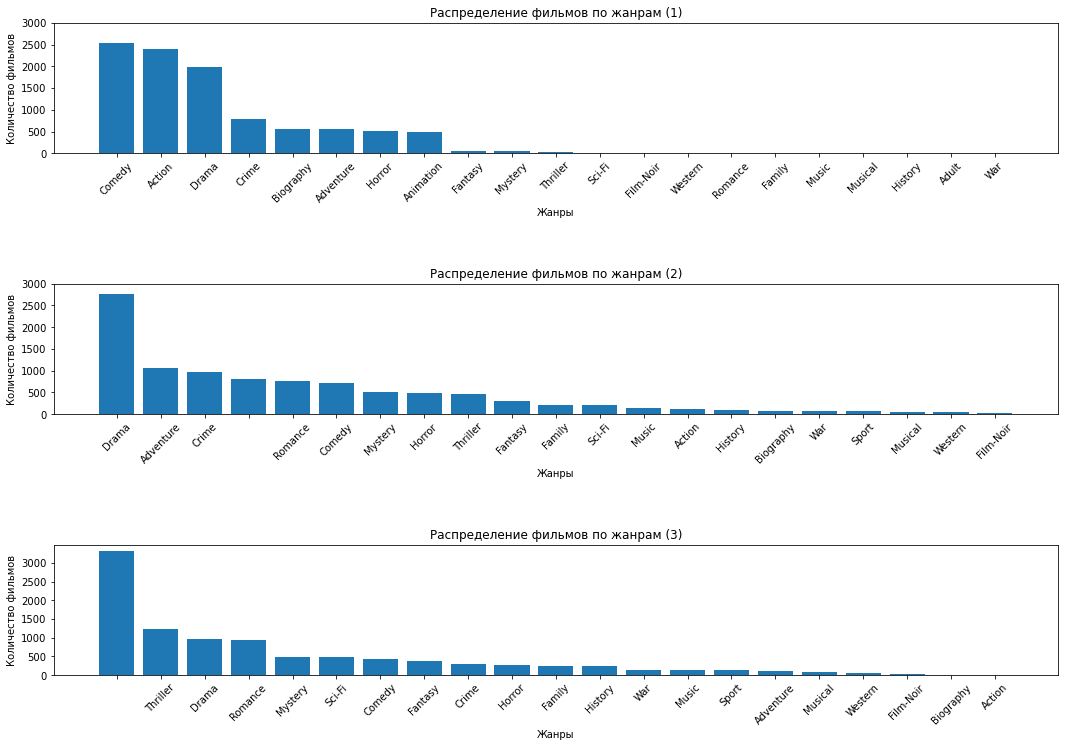

In [562]:
plt.subplots(3, 1, figsize=(18, 12))
plt.subplots_adjust(hspace=1)

plt.subplot(3, 1, 1)
plt.bar(g_1['genre_1'], g_1['title'])
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по жанрам (1)')
plt.xticks(rotation=45)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000]);

plt.subplot(3, 1, 2)
plt.bar(g_2['genre_2'], g_2['title'])
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по жанрам (2)')
plt.xticks(rotation=45)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000]);

plt.subplot(3, 1, 3)
plt.bar(g_3['genre_3'], g_3['title'])
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по жанрам (3)')
plt.xticks(rotation=45)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000]);

- Самый популярный жанр 1 - это Комедия
- Самый популярный жанр 2 - это Драма
- Самый популярный жанр 3 - Это Триллер 


Многие жанры встречаются только по 1 разу

Заметим, что для более чем 3000 фильмов 3 жанр не определен. 

При дальнейшей работе с данными можем удалить 3 столбец, так как при кодировании 3 столбцов с данными о жанрах количество столбцов слишком сильно увеличится, что нежелательно. Кроме того, первые два столбца содержат наиболее релевантные жанры для фильмов. 

Но финальное решение об удалении или не удалении 3 столбца с жанрами мы примем в следующем пункте после визуализации.

**Посмотрим, фильмы каких годов представлены в нашем датасете**

In [563]:
years = df_imdb['year'].unique()
years.sort()
years

array([1915, 1916, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

Представлены фильмы, выпущенные в промежуток с 1915 до 2023 года

Теперь посмотрим, фильмов каких лет больше всего

In [564]:
df_imdb['year'].value_counts().nlargest(10)

2018    356
2014    355
2016    343
2017    338
2013    334
2015    331
2019    328
2011    319
2007    305
2009    304
Name: year, dtype: int64

Больше всего фильмов, выпущенных примерно в период с 2013 до 2018

In [565]:
df_imdb['year'].value_counts().nsmallest(10)

1920    1
1922    1
1915    1
1916    1
1919    1
1926    2
1924    2
1921    2
1923    2
1929    2
Name: year, dtype: int64

Меньше всего старых фильмов, выпущенных с 1915 по 1930

Посмотрим по графику

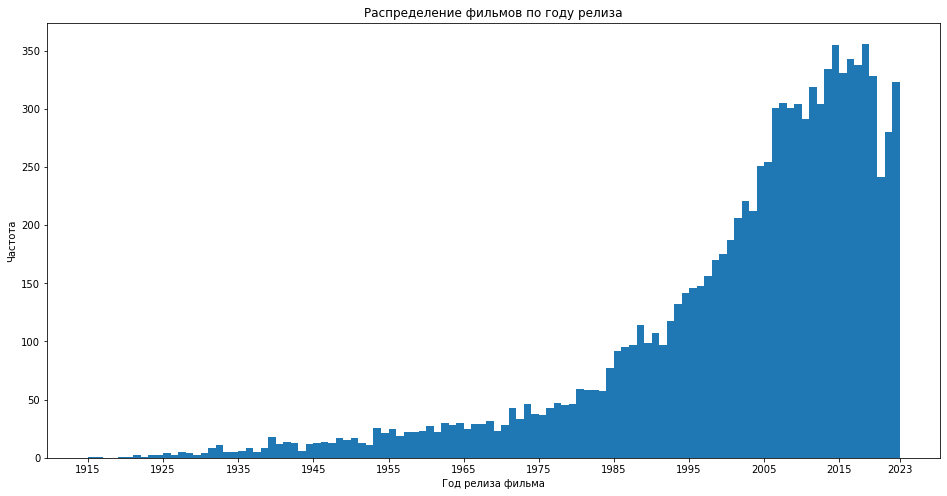

In [566]:
plt.figure(figsize=(16,8))
plt.hist(df_imdb['year'], bins=108)
plt.xticks([1915, 1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015, 2023])
plt.ylabel('Частота')
plt.xlabel('Год релиза фильма')
plt.title('Распределение фильмов по году релиза');

По графику видим, что в нашем датасете представлены в большей степени современные фильмы. Чаще всего действительно встречаются фильмы, выпущенные в промежуток между 2010 и 2020 годами

**Теперь посмотрим на колонку 'runtime' с длительностью фильма**

In [567]:
runtime_list = df_imdb['runtime'].unique()
runtime_list.sort()
runtime_list

array([ 45,  46,  48,  50,  51,  55,  56,  57,  60,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196,
       197, 198, 201, 202, 204, 205, 206, 207, 209, 210, 212, 213, 216,
       218, 219, 220, 224, 229, 237, 238, 242, 247, 260, 271, 288, 317,
       321, 366, 439], dtype=int64)

In [568]:
# Ради интереса посмотрим на этого монстра :)

df_imdb[df_imdb['runtime'] == 439]

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
9318,Сатанинское танго,1994,439,8.2,11804,,0,0,Drama,,


Посмотрим на распределение по графику

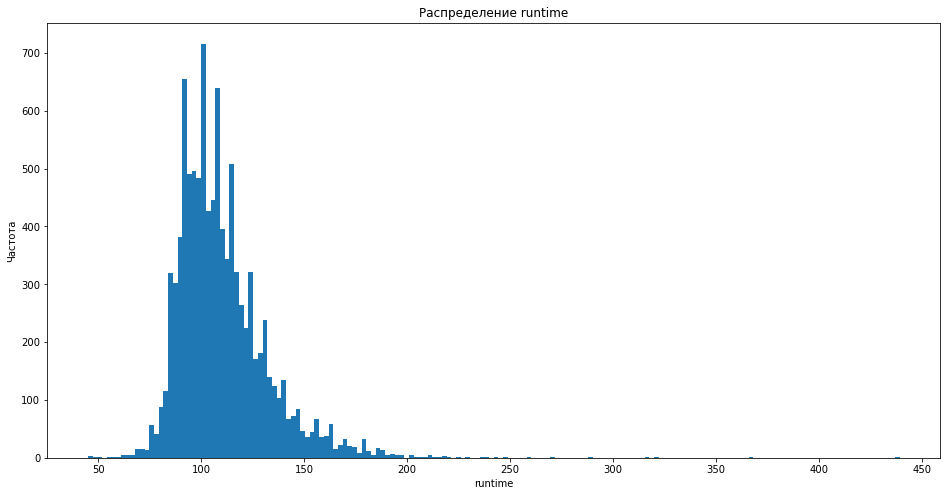

In [569]:
plt.figure(figsize=(16,8))
plt.hist(df_imdb['runtime'], bins=172)
plt.title('Распределение runtime')
plt.ylabel('Частота')
plt.xlabel('runtime');

По графику видно, что среди данных есть выбросы, чья длительность сильно отличается в большую сторону от большинства фильмов. Однако мы не будем их удалять, так как такие фильмы действительно существуют и их длительность может влиять на их рейтинг.

Длительность большинства фильмов находится в промежутке от 70 минут до 120.

При дальнейшей работе с моделями машинного обучения можно будет разбить все фильмы по промежуткам времени на:
- короткометражные 
- среднеметражные
- полнометражные
- длительные
- очень длительные

**Поближе посмотрим на колонку 'votes' с количеством голосов с оценкой фильма**

In [570]:
df_imdb['votes'].dtypes

dtype('int64')

In [571]:
min_edge = df_imdb['votes'].min()
max_edge = df_imdb['votes'].max()

print('Признак votes содержит числовые значения в промежутке от', min_edge, 'до', max_edge)

Признак votes содержит числовые значения в промежутке от 10535 до 2738580


**Теперь поработаем с признаком 'certificate'**

In [572]:
df_imdb['certificate'].unique()

array(['12+', '0+', '18+', '16+', '6+', '14+', 'R', '', 'PG-13', 'PG',
       '16', '(Banned)', 'G', 'M/PG', 'NC-17', 'M', 'GP', 'Not Rated',
       'Unrated', 'Approved'], dtype=object)

Видим, что значения очень разноплановые, используются разные шкалы. Встречаются:
    
    - пустые строки, которыми мы сами в начале заполнили все пропуски
    - 'Not Rated' и 'Unrated', что одно и то же
    - '(Banned)'
    - 'Approved'
    - возрастная классификация ('0+', '6+', '12+', '14+', '16+', '18+')
    - МРАА классификация ('R', 'PG-13', 'PG', 'G', 'M/PG', 'NC-17', 'M', 'GP')
    - число 16

Для начала стандартизируем значения этого столбца, приведя ее к формату стандартной возрастной классификации

**1) Посмотрим на фильмы с пропусками:**

In [573]:
df_imdb[df_imdb['certificate'] == '']

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
188,The Kashmir Files,2022,170,8.7,566096,,0,0,Drama,,
204,Монти Пайтон и священный Грааль,1975,91,8.2,550933,,91,1229197,Adventure,Comedy,Fantasy
324,Аладдин,1992,90,8.0,435177,,86,217350219,Animation,Adventure,Comedy
354,Останься со мной,1986,89,8.1,416342,,75,52287414,Adventure,Drama,
402,Бэтмен,1989,126,7.5,386457,,69,251188924,Action,Adventure,
...,...,...,...,...,...,...,...,...,...,...,...
9931,Азарт любви,2000,162,6.1,10568,,0,426318,Action,Drama,Musical
9934,The Jazz Singer,1927,88,6.4,10562,,66,7630000,Drama,Music,Musical
9938,Маленькая проблема Эйлюль,2014,106,7.1,10558,,0,0,Drama,Mystery,Romance
9940,Sien lui yau wan,1987,98,7.4,10548,,0,0,Action,Fantasy,Horror


Таких фильмов достаточно много, большинство из них содержит другую информацию в полном объеме, поэтому удалять их неразумно. 

В качестве решения, заполним все пропуски значением новой категорией 'Без в/о', что будет значить, что у фильма нет конкретного возрастного ограничения. 

Мы приняли такое решение, чтобы не накладывать на фильмы лишних ограничений, ставя какое-то возрастное ограничение

In [574]:
df_imdb.replace({'certificate': {'': 'Без в/о'}}, inplace=True)

In [575]:
df_imdb[df_imdb['certificate'] == ''].shape

(0, 11)

**2) Посмотрим на фильмы с 'Not Rated' и 'Unrated':**

In [576]:
NR = df_imdb[(df_imdb['certificate'] == 'Not Rated') | (df_imdb['certificate'] == 'Unrated')]
NR

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
5255,Бхарат,2019,150,4.7,31655,Not Rated,0,2971549,Action,Comedy,Drama
5351,Открытая могила,2013,102,6.2,30565,Unrated,33,0,Horror,Mystery,Sci-Fi
6638,Студент года 2,2019,146,2.1,21377,Not Rated,0,778566,Action,Comedy,Drama
6968,Jersey,2019,157,8.5,19723,Not Rated,0,0,Drama,Sport,
7436,"Бандит, полицейский, дьявол",2019,109,6.9,17589,Not Rated,65,216494,Action,Crime,Thriller
7576,Тень,2018,116,7.0,16980,Not Rated,81,521396,Action,Adventure,Drama
7752,Порок,2019,166,3.5,16295,Not Rated,0,2729336,Drama,Romance,
8801,Гладко на бумаге,2021,92,5.6,13062,Unrated,54,0,Comedy,Romance,
9330,Шахта 9,2019,83,6.0,11785,Not Rated,65,226421,Drama,Thriller,
9894,Женщина на войне,2018,101,7.4,10640,Not Rated,81,847495,Adventure,Comedy,Drama


In [577]:
NR.shape[0]

10

Таких фильмов не так много (10), поэтому заполним их рейтинги вручную, на основе информации, которую нам нашел ChatGPT (общение с ChatGPT на эту тему в файле 'ChatGPT.ipynb' под номером 1.

Вот какую информацию нам нашел ChatGPT:

- `Бхарат (2019):`                       16+

- `Открытая могила (2013):`	            18+

- `Студент года 2 (2019):`	            16+

- `Jersey (2019):`	                    12+

- `Бандит, полицейский, дьявол (2019):`	18+

- `Тень (2018):`	                      16+

- `Порок (2019):`	                    18+

- `Гладко на бумаге (2021):`	            16+

- `Шахта 9 (2019):`	                    16+

- `Женщина на войне (2018):`	            16+

In [578]:
age_rest = ['16+', '18+', '16+', '12+', '18+', '16+', '18+', '16+', '16+', '16+']

place = 0

for i in (list(NR['certificate'].index)):
    df_imdb['certificate'][i] = age_rest[place]
    place += 1

In [579]:
df_imdb.iloc[6968]

title          Jersey
year             2019
runtime           157
imdb_rating       8.5
votes           19723
certificate       12+
metascore           0
gross               0
genre_1         Drama
genre_2         Sport
genre_3              
Name: 6968, dtype: object

In [580]:
df_imdb[(df_imdb['certificate'] == 'Not Rated') | (df_imdb['certificate'] == 'Unrated')].shape[0]

0

**3) Посмотрим на фильмы с (Banned):**

In [581]:
BA = df_imdb[df_imdb['certificate'] == '(Banned)']
BA

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
344,Борат,2006,84,7.4,422034,(Banned),89,128505958,Comedy,,
369,Кролик Джоджо,2019,108,7.9,408721,(Banned),58,33370906,Comedy,Drama,War
999,"Южный Парк: Большой, длинный, необрезанный",1999,81,7.7,209453,(Banned),73,52037603,Animation,Comedy,Fantasy
1232,Метрополис,1927,153,8.3,177968,(Banned),98,1236166,Drama,Sci-Fi,
2095,Смерть Сталина,2017,107,7.2,106794,(Banned),88,8041828,Comedy,Drama,History
2305,Гроздья гнева,1940,129,8.1,95960,(Banned),96,55000,Drama,,
2915,Номер 44,2015,137,6.4,73036,(Banned),41,1206135,Crime,Drama,History
6394,Матильда,2022,117,7.1,22731,(Banned),72,0,Comedy,Drama,Family


In [582]:
BA.shape[0]

8

Заменим (Banned) в этих фильмах на возрастные ограничения, которые снова для этих фильмов нашел ChatGPT (разговор с ним в файле ChatGPT.ipynb под номером 2)

- `Борат (2006):`                         18+
- `Кролик Джоджо (2019):`                 16+
- `Южный Парк: Большой, длинный, необрезанный (1999):` 18+
- `Метрополис (1927):`                    12+
- `Смерть Сталина (2017):`                18+
- `Гроздья гнева (1940):`                 16+
- `Номер 44 (2015):`                      16+
- `Матильда (2022):`                      12+

In [583]:
age_rest = ['18+', '16+', '18+', '12+', '18+', '16+', '16+', '12+']

place = 0

for i in (list(BA['certificate'].index)):
    df_imdb['certificate'][i] = age_rest[place]
    place += 1

In [584]:
df_imdb.iloc[2305]

title          Гроздья гнева
year                    1940
runtime                  129
imdb_rating              8.1
votes                  95960
certificate              16+
metascore                 96
gross                  55000
genre_1                Drama
genre_2                     
genre_3                     
Name: 2305, dtype: object

**4) Категория 'Approved':**

Как ответил ChatGPT ('этот разговор с ним в файле ChatGPT.ipynb под номером 3)

"Approved" - это возрастное ограничение к фильму, которое использовалось в США в кинопрокате до 1968 года. Оно означало, что фильм был одобрен ассоциацией MPAA (Motion Picture Association of America) для проката, но не было конкретного возрастного ограничения, как у современных рейтингов. Вместо этого оно означало, что фильм пригоден для просмотра зрителями любого возраста, но родителям рекомендовалось ознакомиться с содержанием фильма перед тем, как позволить детям его смотреть.

"Approved" и "0+" - это разные возрастные ограничения. "Approved" указывает на то, что фильм прошел проверку на соответствие стандартам, но не имеет конкретного возрастного ограничения.


**Поэтому заменим 'Approved' на категорию 'Без в/о', которую мы уже использовали раньше**

In [585]:
df_imdb[df_imdb['certificate'] == 'Approved']

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
9051,D.O.A.,1949,83,7.2,12422,Approved,0,0,Crime,Drama,Film-Noir


In [586]:
df_imdb.replace({'certificate': {'Approved': 'Без в/о'}}, inplace=True)

In [587]:
df_imdb[df_imdb['certificate'] == 'Approved'].shape[0]

0

**5) Заменим МРАА классификацию на возрастные ограничения:**

Данную классификацию провел ChatCPT (этот разговор с ним в файле ChatGPT.ipynb под номером 4)

Проведем замену по следующему алгоритму:

- 'R' -> '17+'

- 'PG-13' -> '13+'

- 'PG' -> '10+'

- 'G' -> '0+'

- 'M/PG' -> '13+'

- 'NC-17' -> '18+'

- 'M' -> '17+'

- 'GP' -> '10+'

In [588]:
df_imdb.replace({'certificate': {'R': '17+', 'PG-13': '13+', 'PG': '10+', 'G': '0+', 'M/PG': '13+', 'NC-17': '18+', 'M': '17+', 'GP': '10+'}}, inplace=True)

**6) Число 16 заменим на 16+**

In [589]:
df_imdb.replace({'certificate': {'16': '16+'}}, inplace=True)

**7) Посмотрим на итоговый результат**

In [590]:
df_imdb['certificate'].unique()

array(['12+', '0+', '18+', '16+', '6+', '14+', '17+', 'Без в/о', '13+',
       '10+'], dtype=object)

Ура, все чистенько, понятненько и готово к дальнейшему кодированию для машинного обучения

Закодируем возрастные ограничения по следующему алгоритму:

- 'Без в/0'   ------>   0
- '0+' ------------->   1
- '6+' ------------->   2
- '10+'------------->   3
- '12+'------------->   4
- '13+'------------->   5
- '14+'------------->   6
- '16+'------------->   7
- '17+'------------->   8
- '18+'------------->   9

In [591]:
df_imdb.replace({'certificate': 
                 {'Без в/о': 0, '0+': 1, '6+': 2, '10+': 3, '12+': 4, '13+': 5, '14+': 6, '16+': 7, '17+': 8, '18+': 9, }}, inplace=True)

In [592]:
df_imdb['certificate'].unique()

array([4, 1, 9, 7, 2, 6, 8, 0, 5, 3], dtype=int64)

In [593]:
df_imdb

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,Железный человек,2008,126,7.9,1080097,4,79,318412101,Action,Adventure,Sci-Fi
1,Звёздные войны. Эпизод 6: Возвращение джедая,1983,131,8.3,1075244,1,58,309125409,Action,Adventure,Fantasy
2,Вверх,2009,96,8.3,1066875,1,88,293004164,Animation,Adventure,Comedy
3,Дэдпул,2016,108,8.0,1064946,9,65,363070709,Action,Comedy,
4,В поисках Немо,2003,100,8.2,1064301,1,90,380843261,Animation,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
9992,Терминатор 2: Судный день,1991,137,8.6,1120808,7,75,204843350,Action,Sci-Fi,
9993,Мстители: Война бесконечности,2018,149,8.4,1118710,7,68,678815482,Action,Adventure,Sci-Fi
9994,Шоу Трумана,1998,103,8.2,1113885,1,90,125618201,Comedy,Drama,
9995,Подозрительные лица,1995,106,8.5,1102596,7,77,23341568,Crime,Drama,Mystery


**Займемся metascore и gross**

In [594]:
print(df_imdb['metascore'].dtypes)
print(df_imdb['gross'].dtypes)

int64
int64


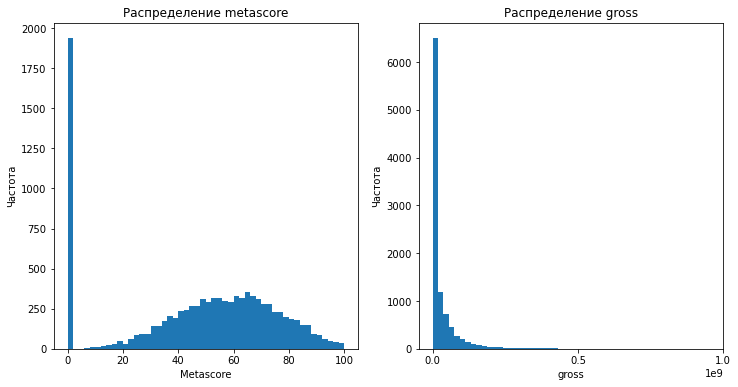

In [595]:
plt.subplots(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_imdb['metascore'], bins=50)
plt.title('Распределение metascore')
plt.ylabel('Частота')
plt.xlabel('Metascore')

plt.subplot(1, 2, 2)
plt.hist(df_imdb['gross'], bins=50)
plt.title('Распределение gross')
plt.ylabel('Частота')
plt.xlabel('gross')
plt.xticks([0, 500000000, 1000000000]);

Среди числовых значений у нас есть много 0

In [596]:
df_imdb['gross'].value_counts()

0            2753
4360000         8
8720000         7
10000000        6
25000000        6
             ... 
71516617        1
40471663        1
60891           1
2141423         1
422783777       1
Name: gross, Length: 7140, dtype: int64

In [597]:
df_imdb['metascore'].value_counts()

0     1936
65     180
61     180
66     180
64     175
      ... 
10       2
1        1
6        1
5        1
8        1
Name: metascore, Length: 98, dtype: int64

Посмотрим на эти фильмы

In [598]:
df_imdb[df_imdb['gross'] == 0]

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
188,The Kashmir Files,2022,170,8.7,566096,0,0,0,Drama,,
201,Не смотрите наверх,2021,138,7.2,556302,9,49,0,Comedy,Drama,Sci-Fi
276,Эта замечательная жизнь,1946,130,8.6,471248,3,89,0,Drama,Family,Fantasy
361,Лига справедливости Зака Снайдера,2021,242,8.0,411479,9,54,0,Action,Adventure,Fantasy
397,Достать ножи: Стеклянная луковица,2022,139,7.1,388638,5,81,0,Comedy,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...
9936,Лихорадка,2016,99,3.7,10559,8,14,0,Horror,Sci-Fi,Thriller
9937,Вампиры в Бронксе,2020,85,5.7,10559,5,76,0,Comedy,Horror,
9938,Маленькая проблема Эйлюль,2014,106,7.1,10558,0,0,0,Drama,Mystery,Romance
9940,Sien lui yau wan,1987,98,7.4,10548,0,0,0,Action,Fantasy,Horror


In [599]:
df_imdb[df_imdb['metascore'] == 0]

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
188,The Kashmir Files,2022,170,8.7,566096,0,0,0,Drama,,
598,Доказательство смерти,2007,127,7.0,300192,9,0,0,Action,Thriller,
610,Хатико: самый верный друг,2009,93,8.1,294164,1,0,0,Biography,Drama,Family
896,Великий диктатор,1940,125,8.4,228288,1,0,288475,Comedy,Drama,War
964,Планета страха,2007,105,7.1,216445,9,0,0,Action,Comedy,Horror
...,...,...,...,...,...,...,...,...,...,...,...
9940,Sien lui yau wan,1987,98,7.4,10548,0,0,0,Action,Fantasy,Horror
9942,Азбука футбола,1995,100,5.5,10544,3,0,17725500,Comedy,Family,Sport
9943,Перестрелка в Локандвале,2007,122,7.1,10544,0,0,289232,Action,Crime,History
9944,Астерикс и тайное зелье,2018,87,6.7,10542,2,0,1271953,Animation,Adventure,Comedy


У всех этих фильмов есть IMDb rating и определенное количество голосов. Они не выглядят, как провальные проекты без сборов и без отзывов критиков.

Будем считать, что 0 в этих колонках равен NaN, поэтому заменим нули на медианное значение по столбцам.

Почему на медиану? Потому что медиана не будет 'выделяться' на фоне остальных значений. Она будет примерно равна 'нейтральному' значению, которое имеет большинство. 

Почему не используем среднее? Среднее менее устойчиво к выбросам, а для нас это крайне плохо, особенно в случае с gross, где встречаются выбросы.

In [600]:
median_gross = df_imdb['gross'].median()
median_metascore = df_imdb['metascore'].median()

In [601]:
df_imdb.replace({'gross': {0 : median_gross}, 'metascore': {0 : median_metascore}}, inplace=True)

Посмотрим на графики еще раз

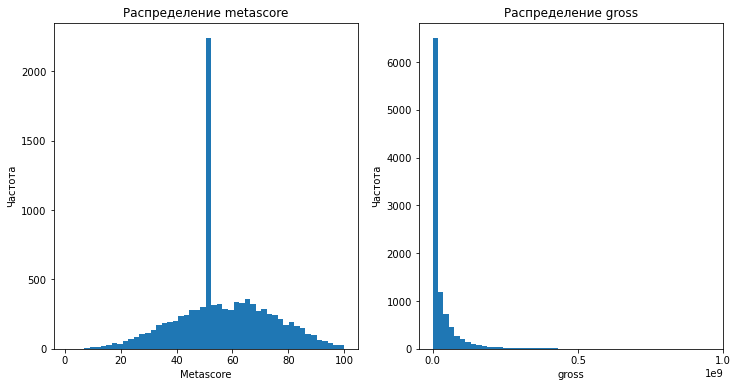

In [602]:
plt.subplots(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_imdb['metascore'], bins=50)
plt.title('Распределение metascore')
plt.ylabel('Частота')
plt.xlabel('Metascore')

plt.subplot(1, 2, 2)
plt.hist(df_imdb['gross'], bins=50)
plt.title('Распределение gross')
plt.ylabel('Частота')
plt.xlabel('gross')
plt.xticks([0, 500000000, 1000000000]);

In [603]:
df_imdb['metascore'].value_counts()

52    2082
65     180
61     180
66     180
64     175
      ... 
10       2
1        1
6        1
5        1
8        1
Name: metascore, Length: 97, dtype: int64

In [604]:
df_imdb['gross'].value_counts()

4899194      2754
4360000         8
8720000         7
25000000        6
10000000        6
             ... 
71516617        1
40471663        1
60891           1
2141423         1
422783777       1
Name: gross, Length: 7139, dtype: int64

Теперь самый частый вариант для gross - 4899194, а для metascore - 52

**Проанализуем колонку 'imdb_rating'**

In [605]:
df_imdb['imdb_rating'].dtypes

dtype('float64')

In [606]:
imdb = df_imdb['imdb_rating'].unique()
imdb.sort()
imdb

array([1. , 1.1, 1.2, 1.3, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
       2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5,
       7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
       8.9, 9. , 9.2, 9.3])

- Минимимальный рейтинг imdb - 1
- Максимальный рейтинг imdb - 9.3

Посмотрим на график

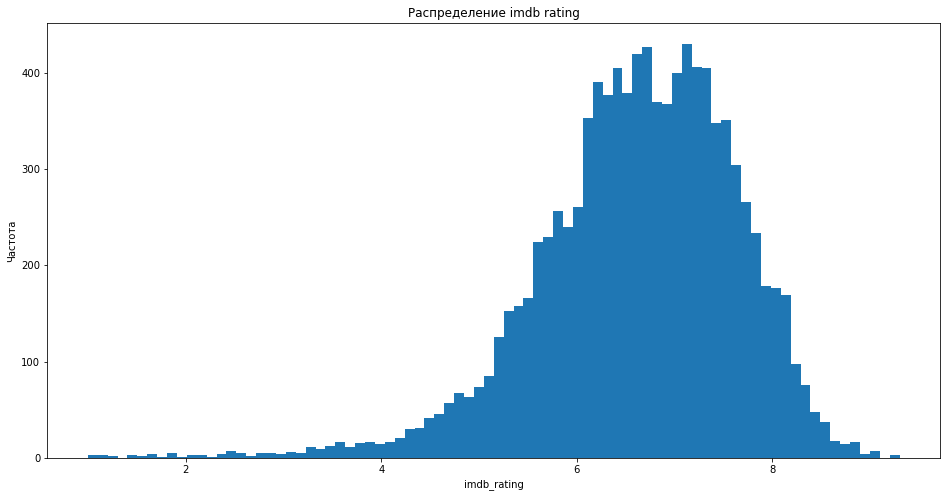

In [607]:
plt.figure(figsize=(16,8))
plt.hist(df_imdb['imdb_rating'], bins=82)
plt.title('Распределение imdb rating')
plt.ylabel('Частота')
plt.xlabel('imdb_rating');

Большинство фильмов имеют imdb_rating в диапозоне между 6 и 7.5

Фильмов с оценкой до 4 мало, но они есть и сдвигают распределение вправо

### Посмотрим на 2 датасет

In [608]:
df_KP = pd.read_csv('dfKP_3000.csv', sep=',')
df_KP

,title,country,director,actor_1,actor_2,ratingKP
0,1+1,Франция,Оливье Накаш,Франсуа Клюзе,Омар Си,8.805
1,Джентльмены,Великобритания,Гай Ричи,Мэттью МакКонахи,Чарли Ханнэм,8.546
2,Волк с Уолл-стрит,США,Мартин Скорсезе,Леонардо ДиКаприо,Джона Хилл,7.970
3,Гнев человеческий,Великобритания,Гай Ричи,Джейсон Стэйтем,Холт Маккэллани,7.588
4,Брат,Россия,Алексей Балабанов,Сергей Бодров мл.,Виктор Сухоруков,8.293
...,...,...,...,...,...,...
2995,Бабло,Россия,Константин Буслов,Роман Мадянов,Яков Кучеревский,6.589
2996,Шахматист,Франция,Пьер-Франсуа Мартен-Лаваль,Ассад Ахмед,Жерар Депардье,7.576
2997,Шутки в сторону,Франция,Давид Шарон,Омар Си,Лоран Лафитт,6.441
2998,Воспитание чувств,Великобритания,Лоне Шерфиг,Кэри Маллиган,Питер Сарсгаард,7.406


__Описание колонок:__

- `title` — название фильма
- `country` — страна создания фильма
- `director`  — режиссер фильма
- `actor_1` — актер 1 в фильме
- `actor_2` — актер 2 в фильме
- `ratingKP` — рейтинг фильма от сайта 'КиноПоиск'

Посмотрим на информацию о датасете

In [609]:
df_KP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     3000 non-null   object 
 1   country   3000 non-null   object 
 2   director  2999 non-null   object 
 3   actor_1   2999 non-null   object 
 4   actor_2   2999 non-null   object 
 5   ratingKP  2999 non-null   float64
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


Видим, что у нас в колонках 'director', 'actor_1', 'actor_2', 'ratingKP' есть 1 пропуск

Попробуем найти его, может все эти пропуски относятся к одному и тому же фильму

In [610]:
df_KP[df_KP.isnull().any(axis=1)].index

Int64Index([1642, 1941], dtype='int64')

In [611]:
df_KP.iloc[[1642, 1941]]

,title,country,director,actor_1,actor_2,ratingKP
1642,Он вам не Димон,Россия,NaN,NaN,NaN,9.118
1941,Нападение на Рио Браво,США,Джо Корнет,Александр Невский,Оливье Грюнер,NaN


Пропуски содержатся в двух фильмах, предлагаем их удалить

In [612]:
df_KP = df_KP.drop([1642, 1941])

Проверим еще раз на пропуски

In [613]:
df_KP.isna().sum()

title       0
country     0
director    0
actor_1     0
actor_2     0
ratingKP    0
dtype: int64

Пропусков нет

**Посмотрим на страны производства фильмов**

In [614]:
df_KP['country'].unique()

array(['Франция', 'Великобритания', 'США', 'Россия', 'СССР', 'Новая',
       'Германия', 'Япония', 'Корея', 'Австралия', 'Гонконг', 'Дания',
       'Италия', 'Канада', 'Швеция', 'ЮАР', 'Беларусь', 'Бельгия',
       'Испания', 'Китай', 'Швейцария', 'Бразилия', 'Мексика',
       'Индонезия', 'Ливан', 'Ирландия', 'Аргентина', 'Индия', 'Польша',
       'Норвегия', 'Эстония', 'Финляндия', 'Чехия', 'Чили', 'Нидерланды',
       'Казахстан', 'Болгария', 'Украина', 'Исландия', 'Тайвань',
       'Чехословакия'], dtype=object)

In [615]:
df_KP['country'].value_counts().nlargest(10)

США               1769
Россия             370
Великобритания     260
Франция            144
СССР               119
Германия            53
Канада              47
Австралия           29
Испания             28
Корея               28
Name: country, dtype: int64

In [616]:
df_KP['country'].value_counts().nsmallest(10)

Болгария        1
Тайвань         1
Исландия        1
Украина         1
Швейцария       1
Чили            1
Ливан           1
Бразилия        1
Чехословакия    1
Индонезия       2
Name: country, dtype: int64

Посмотрим на график

In [617]:
coun = pd.DataFrame(df_KP['country'].value_counts()).reset_index()
coun.columns = ['country', 'number']
coun

,country,number
0,США,1769
1,Россия,370
2,Великобритания,260
3,Франция,144
4,СССР,119
5,Германия,53
6,Канада,47
7,Австралия,29
8,Испания,28
9,Корея,28


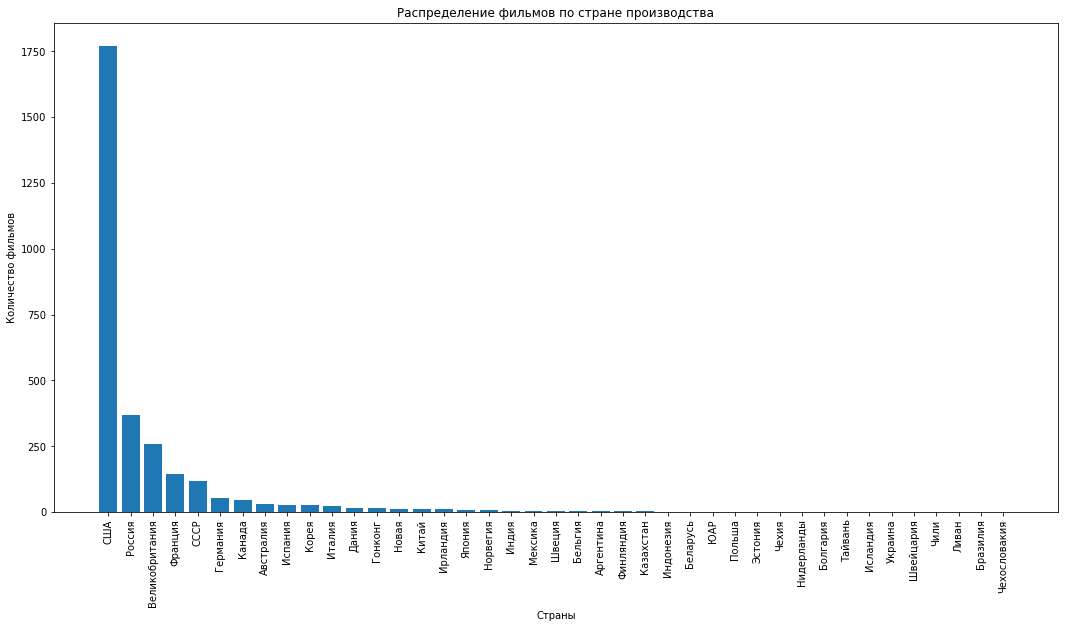

In [618]:
plt.figure(figsize=(18, 9))
plt.bar(coun['country'], coun['number'])
plt.xlabel('Страны')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по стране производства')
plt.xticks(rotation=90);

Видим, что большинство фильмов произведены в США, Росии, Велмкобритании, Франции, СССР

Есть страны, фильмы которых представлены в очень маленьком количестве в нашем датасете

**Посмотрим на информацию о режиссерах и актерах**

In [619]:
df['director'].unique().shape[0]

928

In [620]:
df['actor_1'].unique().shape[0]

773

In [621]:
df['actor_2'].unique().shape[0]

1108

In [622]:
df_KP['director'].value_counts().nlargest(10)

Стивен Спилберг     20
Ридли Скотт         20
Тим Бёртон          15
Роберт Родригес     14
Майкл Бэй           14
Клинт Иствуд        13
Роланд Эммерих      13
Роберт Земекис      13
Гай Ричи            12
М. Найт Шьямалан    11
Name: director, dtype: int64

In [623]:
df_KP['actor_1'].value_counts().nlargest(10)

Джонни Депп          27
Том Круз             26
Брюс Уиллис          24
Роберт Де Ниро       21
Том Хэнкс            21
Адам Сэндлер         21
Дуэйн Джонсон        21
Джейсон Стэйтем      21
Леонардо ДиКаприо    20
Киану Ривз           19
Name: actor_1, dtype: int64

In [624]:
df_KP['actor_2'].value_counts().nlargest(10)

Роберт Де Ниро        11
Сэмюэл Л. Джексон     11
Морган Фриман         10
Кейт Бланшетт         10
Венсан Кассель        10
Роуз Бирн             10
Джуд Лоу              10
Скарлетт Йоханссон     9
Колин Фёрт             9
Рэйчел Вайс            9
Name: actor_2, dtype: int64

Видим в этих столбах буйное разнообразие актеров и режиссеров

**Теперь обратим внимание на рейтинг Кинопоиска**

In [625]:
df_KP['ratingKP'].dtypes

dtype('float64')

In [626]:
KP = df_KP['ratingKP'].unique()
KP.sort()
KP

array([1.112, 2.52 , 2.533, ..., 8.918, 9.073, 9.108])

- Минимальный рейтинг - 1.112
- Максимальный рейтинг - 9.108

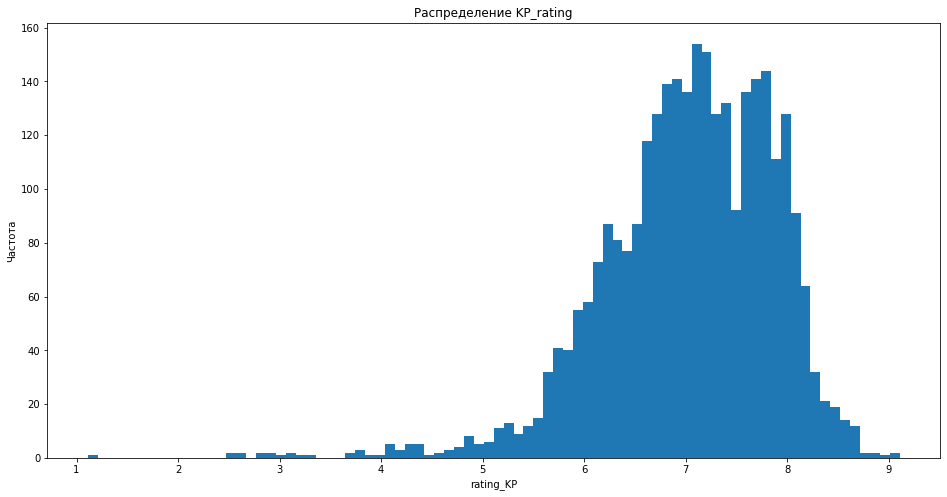

In [627]:
plt.figure(figsize=(16,8))
plt.hist(df_KP['ratingKP'], bins=82)
plt.title('Распределение KP_rating')
plt.ylabel('Частота')
plt.xlabel('rating_KP');

Видим ситуацию, схожею с IMDb рейтингом:

Большинство фильмов имеют рейтинг КиноПоиска в диапозоне между 6.5 и 8

Фильмов с оценкой до 5 мало, но они есть и сдвигают распределение вправо

Наблюдаются выбросы с оценками, близкими к 1

### Попробуем объединить оба датасета

Для этого, во-первых, приведем названия фильмов с нижнему регистру, удалим пунктуацию и пропуски

In [628]:
df_KP['title'] = df_KP['title'].str.lower()
df_KP['title'] = df_KP['title'].str.replace('[{}]'.format(string.punctuation), '')
df_KP['title'] = df_KP['title'].str.replace(' ', '')

In [629]:
df_KP

,title,country,director,actor_1,actor_2,ratingKP
0,11,Франция,Оливье Накаш,Франсуа Клюзе,Омар Си,8.805
1,джентльмены,Великобритания,Гай Ричи,Мэттью МакКонахи,Чарли Ханнэм,8.546
2,волксуоллстрит,США,Мартин Скорсезе,Леонардо ДиКаприо,Джона Хилл,7.970
3,гневчеловеческий,Великобритания,Гай Ричи,Джейсон Стэйтем,Холт Маккэллани,7.588
4,брат,Россия,Алексей Балабанов,Сергей Бодров мл.,Виктор Сухоруков,8.293
...,...,...,...,...,...,...
2995,бабло,Россия,Константин Буслов,Роман Мадянов,Яков Кучеревский,6.589
2996,шахматист,Франция,Пьер-Франсуа Мартен-Лаваль,Ассад Ахмед,Жерар Депардье,7.576
2997,шуткивсторону,Франция,Давид Шарон,Омар Си,Лоран Лафитт,6.441
2998,воспитаниечувств,Великобритания,Лоне Шерфиг,Кэри Маллиган,Питер Сарсгаард,7.406


**В настоящее время в наших датасетах проблема: встречаются разные фильмы с одинаковыми названиями, поэтому просто объединять по названию неправильно (непонятно по одинаковым фильмам объединится информация или по фильмам-тескам)**

**Мы планируем решить эту проблему, запарсив в датасет из Кинопоиска еще информацию о годе выпуска фильма, чтобы объединять фильм по названию и году выпуска одновременно**

**В данный момент у нас нет информации о годе в датасете КиноПоиска, поэтому для черновой версии мы удалим все фильмы-двойники в обоих датасетах, чтобы избежать ошибки при объединении**

In [630]:
duplicates = df_KP.loc[df_KP.duplicated(subset='title'), :]
dup = list(duplicates['title'])
dup[:10]

['время',
 'мумия',
 'славныепарни',
 'хищник',
 'турист',
 'одержимость',
 'вспомнитьвсё',
 'экипаж',
 'жизньпрекрасна',
 'таксист']

In [631]:
len(dup)

120

In [632]:
df_KP[df_KP['title'] == 'турист']

,title,country,director,actor_1,actor_2,ratingKP
616,турист,Россия,Андрей Щербинин,Алексей Шевченков,Евгений Терских,7.354
617,турист,США,Флориан Хенкель фон Доннерсмарк,Джонни Депп,Анджелина Джоли,6.758


In [633]:
df_KP_filtered = df_KP[~df_KP['title'].isin(dup)]

In [634]:
df_KP_filtered

,title,country,director,actor_1,actor_2,ratingKP
0,11,Франция,Оливье Накаш,Франсуа Клюзе,Омар Си,8.805
1,джентльмены,Великобритания,Гай Ричи,Мэттью МакКонахи,Чарли Ханнэм,8.546
2,волксуоллстрит,США,Мартин Скорсезе,Леонардо ДиКаприо,Джона Хилл,7.970
3,гневчеловеческий,Великобритания,Гай Ричи,Джейсон Стэйтем,Холт Маккэллани,7.588
4,брат,Россия,Алексей Балабанов,Сергей Бодров мл.,Виктор Сухоруков,8.293
...,...,...,...,...,...,...
2995,бабло,Россия,Константин Буслов,Роман Мадянов,Яков Кучеревский,6.589
2996,шахматист,Франция,Пьер-Франсуа Мартен-Лаваль,Ассад Ахмед,Жерар Депардье,7.576
2997,шуткивсторону,Франция,Давид Шарон,Омар Си,Лоран Лафитт,6.441
2998,воспитаниечувств,Великобритания,Лоне Шерфиг,Кэри Маллиган,Питер Сарсгаард,7.406


Повторим те же самые действия для датасета с IMDb

In [635]:
df_imdb['title'] = df_imdb['title'].str.lower()
df_imdb['title'] = df_imdb['title'].str.replace('[{}]'.format(string.punctuation), '')
df_imdb['title'] = df_imdb['title'].str.replace(' ', '')

In [636]:
df_imdb

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,железныйчеловек,2008,126,7.9,1080097,4,79,318412101,Action,Adventure,Sci-Fi
1,звёздныевойныэпизод6возвращениеджедая,1983,131,8.3,1075244,1,58,309125409,Action,Adventure,Fantasy
2,вверх,2009,96,8.3,1066875,1,88,293004164,Animation,Adventure,Comedy
3,дэдпул,2016,108,8.0,1064946,9,65,363070709,Action,Comedy,
4,впоискахнемо,2003,100,8.2,1064301,1,90,380843261,Animation,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
9992,терминатор2судныйдень,1991,137,8.6,1120808,7,75,204843350,Action,Sci-Fi,
9993,мстителивойнабесконечности,2018,149,8.4,1118710,7,68,678815482,Action,Adventure,Sci-Fi
9994,шоутрумана,1998,103,8.2,1113885,1,90,125618201,Comedy,Drama,
9995,подозрительныелица,1995,106,8.5,1102596,7,77,23341568,Crime,Drama,Mystery


In [637]:
duplicates = df_imdb.loc[df_imdb.duplicated(subset='title'), :]
dup = list(duplicates['title'])
dup[:10]

['бэтмен',
 'жизньпрекрасна',
 'красавицаичудовище',
 'аладдин',
 'вспомнитьвсё',
 'схватка',
 'охотникизапривидениями',
 'робокоп',
 'девушкастатуировкойдракона',
 'дракула']

In [638]:
len(dup)

410

In [639]:
df_imdb_filtered = df_imdb[~df_imdb['title'].isin(dup)]

In [640]:
df_imdb_filtered

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3
0,железныйчеловек,2008,126,7.9,1080097,4,79,318412101,Action,Adventure,Sci-Fi
1,звёздныевойныэпизод6возвращениеджедая,1983,131,8.3,1075244,1,58,309125409,Action,Adventure,Fantasy
2,вверх,2009,96,8.3,1066875,1,88,293004164,Animation,Adventure,Comedy
3,дэдпул,2016,108,8.0,1064946,9,65,363070709,Action,Comedy,
4,впоискахнемо,2003,100,8.2,1064301,1,90,380843261,Animation,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
9991,убитьбилла,2003,111,8.2,1138506,7,69,70099045,Action,Crime,Drama
9992,терминатор2судныйдень,1991,137,8.6,1120808,7,75,204843350,Action,Sci-Fi,
9993,мстителивойнабесконечности,2018,149,8.4,1118710,7,68,678815482,Action,Adventure,Sci-Fi
9994,шоутрумана,1998,103,8.2,1113885,1,90,125618201,Comedy,Drama,


### Объединим два датасета:

In [641]:
df = pd.merge(df_imdb_filtered, df_KP_filtered, on='title')
df

,title,year,runtime,imdb_rating,votes,certificate,metascore,gross,genre_1,genre_2,genre_3,country,director,actor_1,actor_2,ratingKP
0,железныйчеловек,2008,126,7.9,1080097,4,79,318412101,Action,Adventure,Sci-Fi,США,Джон Фавро,Роберт Дауни мл.,Джефф Бриджес,7.960
1,дэдпул,2016,108,8.0,1064946,9,65,363070709,Action,Comedy,,США,Тим Миллер,Райан Рейнольдс,Морена Баккарин,7.560
2,храброесердце,1995,178,8.4,1054106,7,68,75600000,Biography,Drama,History,США,Мэл Гибсон,Мэл Гибсон,Софи Марсо,8.292
3,сияние,1980,146,8.4,1046605,9,66,44017374,Drama,Horror,,США,Стэнли Кубрик,Джек Николсон,Шелли Дювалл,7.776
4,бешеныепсы,1992,99,8.3,1040818,9,81,2832029,Crime,Thriller,,США,Квентин Тарантино,Харви Кейтель,Тим Рот,8.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,убитьбилла,2003,111,8.2,1138506,7,69,70099045,Action,Crime,Drama,США,Квентин Тарантино,Ума Турман,Люси Лью,7.678
1850,терминатор2судныйдень,1991,137,8.6,1120808,7,75,204843350,Action,Sci-Fi,,США,Джеймс Кэмерон,Арнольд Шварценеггер,Линда Хэмилтон,8.340
1851,мстителивойнабесконечности,2018,149,8.4,1118710,7,68,678815482,Action,Adventure,Sci-Fi,США,Энтони Руссо,Роберт Дауни мл.,Крис Хемсворт,8.062
1852,шоутрумана,1998,103,8.2,1113885,1,90,125618201,Comedy,Drama,,США,Питер Уир,Джим Керри,Лора Линни,8.274


На настоящий момент у нас получилось чуть меньше 2000 данных. При дальнейшей работой по проекту мы планируем увеличить это число

In [642]:
df.isna().sum()

title          0
year           0
runtime        0
imdb_rating    0
votes          0
certificate    0
metascore      0
gross          0
genre_1        0
genre_2        0
genre_3        0
country        0
director       0
actor_1        0
actor_2        0
ratingKP       0
dtype: int64

In [643]:
df.dtypes

title           object
year             int64
runtime          int64
imdb_rating    float64
votes            int64
certificate      int64
metascore        int64
gross            int64
genre_1         object
genre_2         object
genre_3         object
country         object
director        object
actor_1         object
actor_2         object
ratingKP       float64
dtype: object

## Шаг 4: Визуализация

Построим первый график, по которому можно сориентироваться 

По диагонали — маргинальное распределение каждой числовой переменной с учётом целевой переменной. В остальных ячейках — scatter plot каждой пары числовых переменных с учётом целевой переменной.

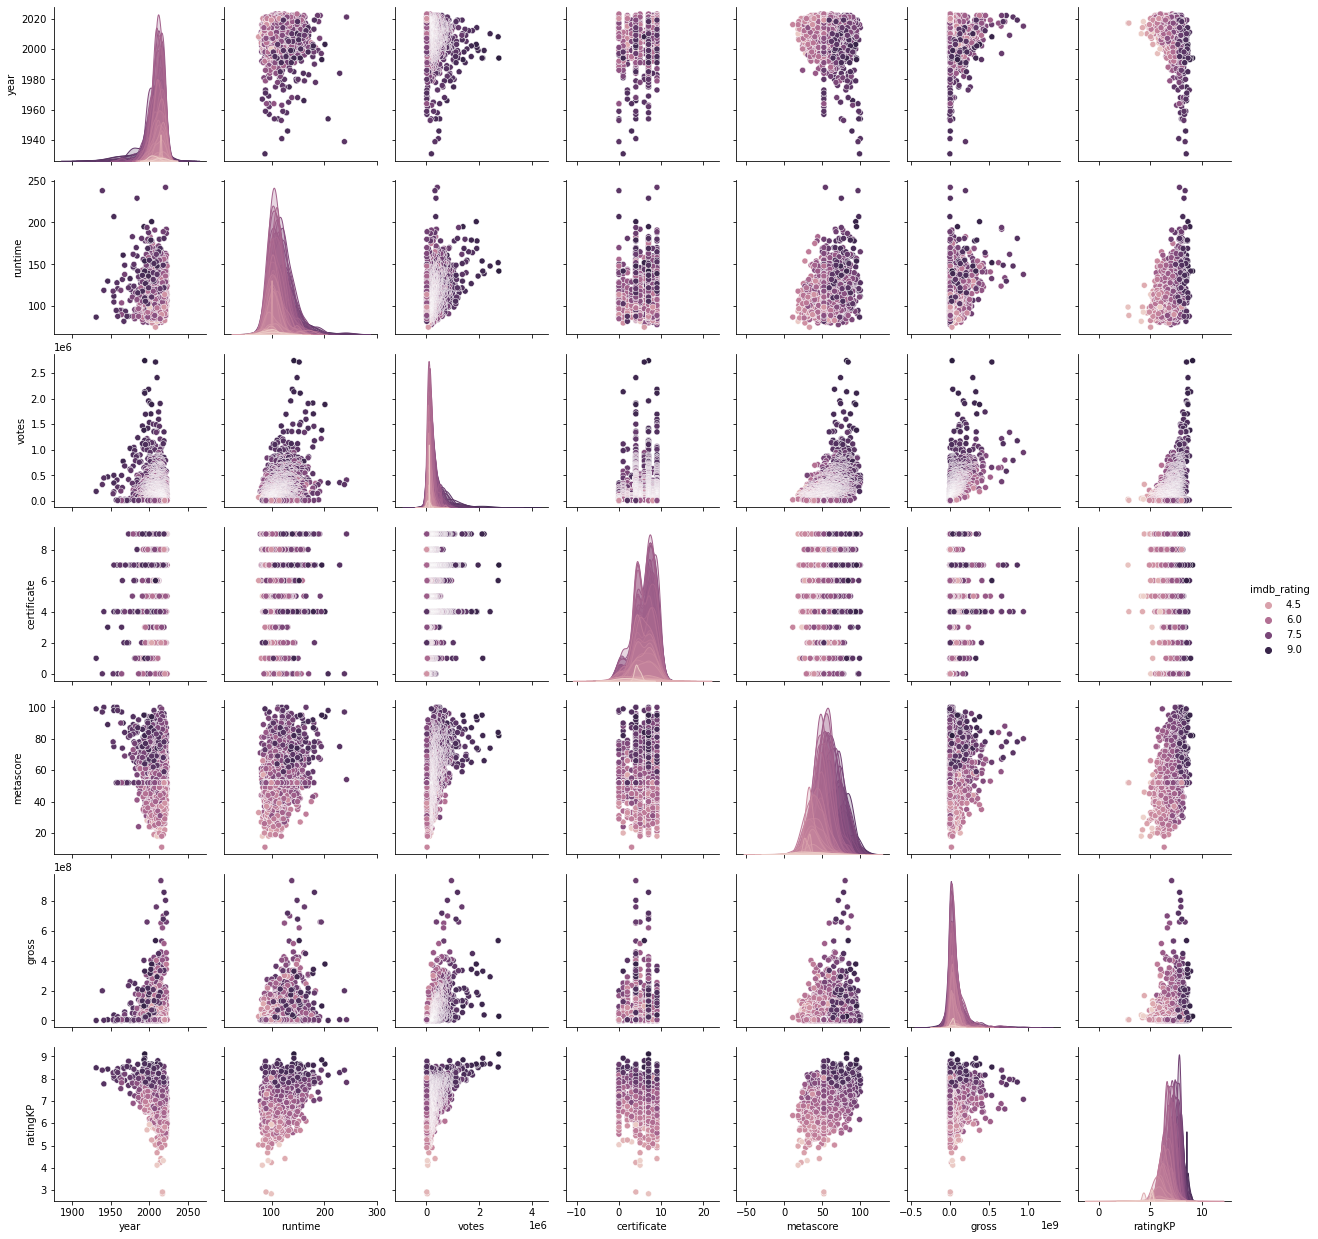

In [644]:
sns.pairplot(df, hue="imdb_rating");

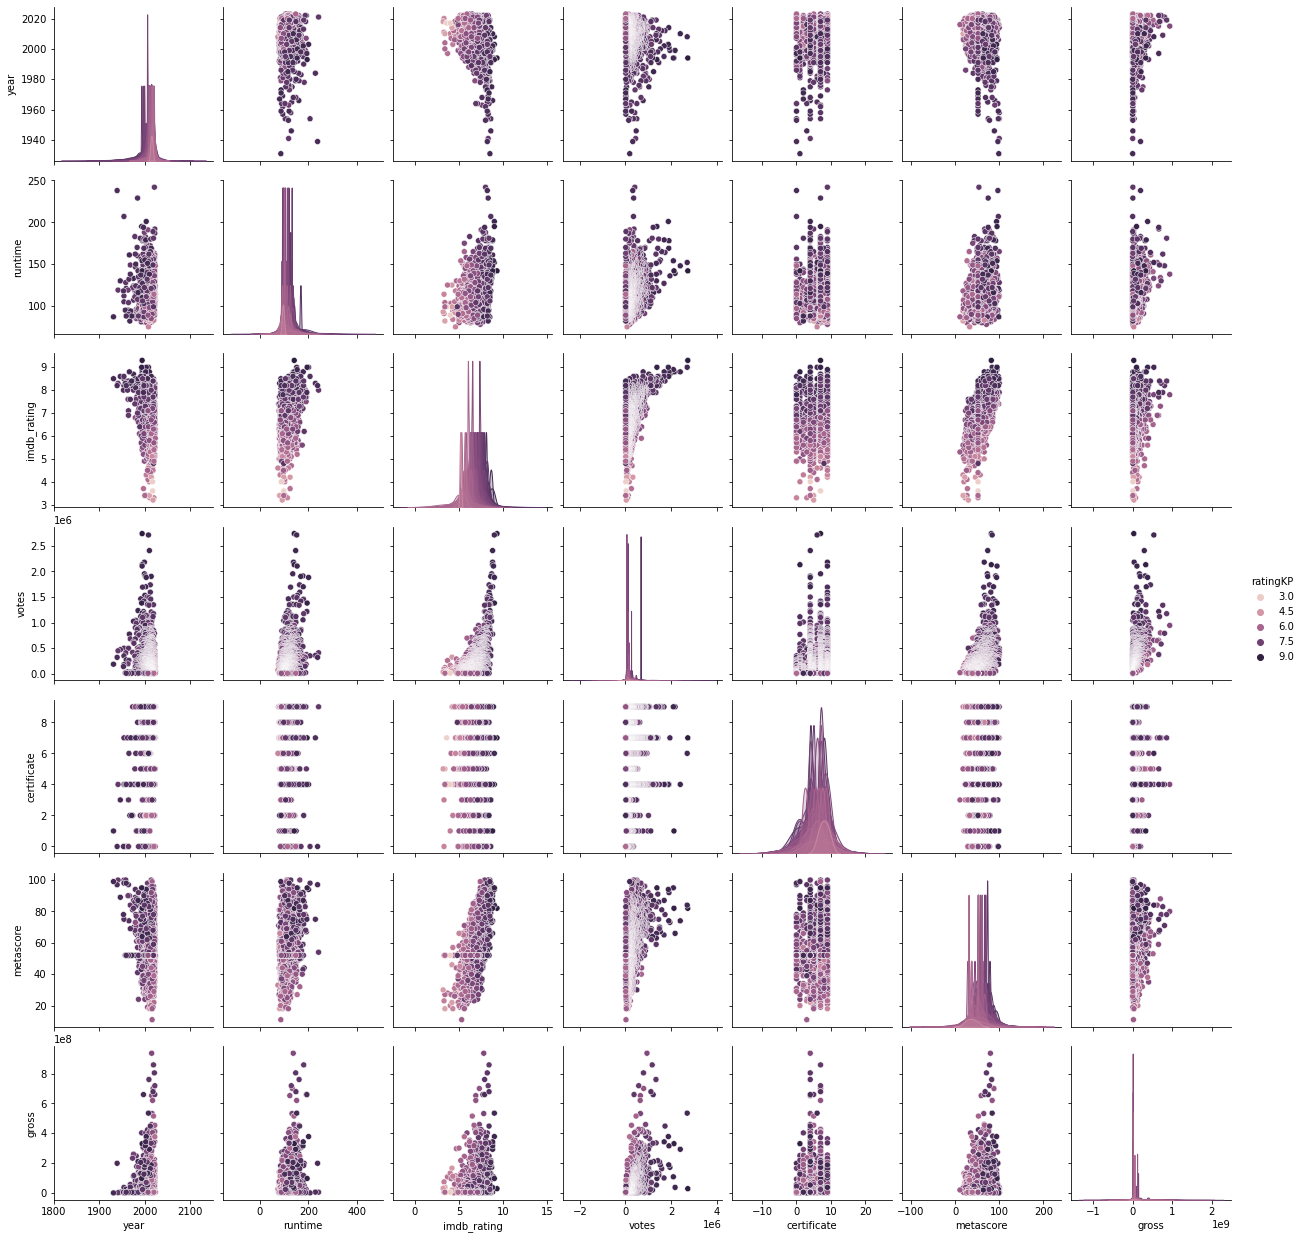

In [645]:
sns.pairplot(df, hue="ratingKP");

Также выведем матрицу корреляций

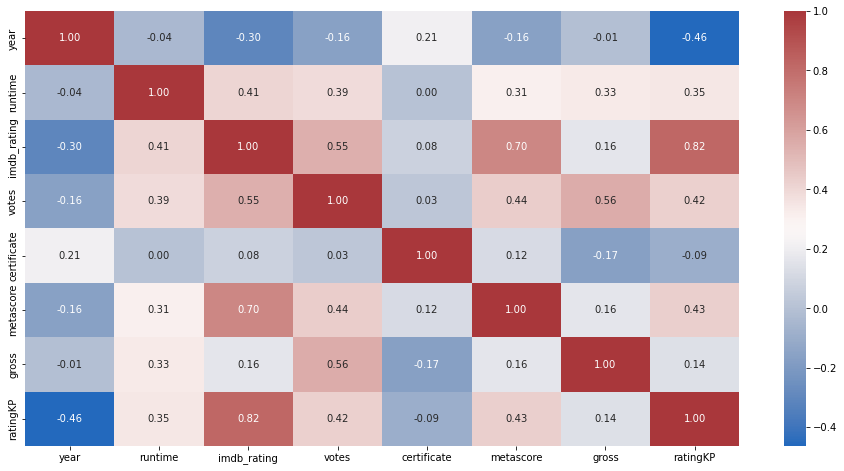

In [646]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f");

Исходя из полученных графиков, для начала повнимательнее изучим связь между следующими признаками:

- между imdb_rating и KP_rating (довольно очевидно, что между ними должна быть связь, на это как раз показывает корреляция)
- между certificate и imdb_rating/KP_rating (получаются интересные scatter plots)
- между metascore и imdb_rating/KP_rating (высокий коэффициент корреляции и наблюдается зависимость по scatter plots)

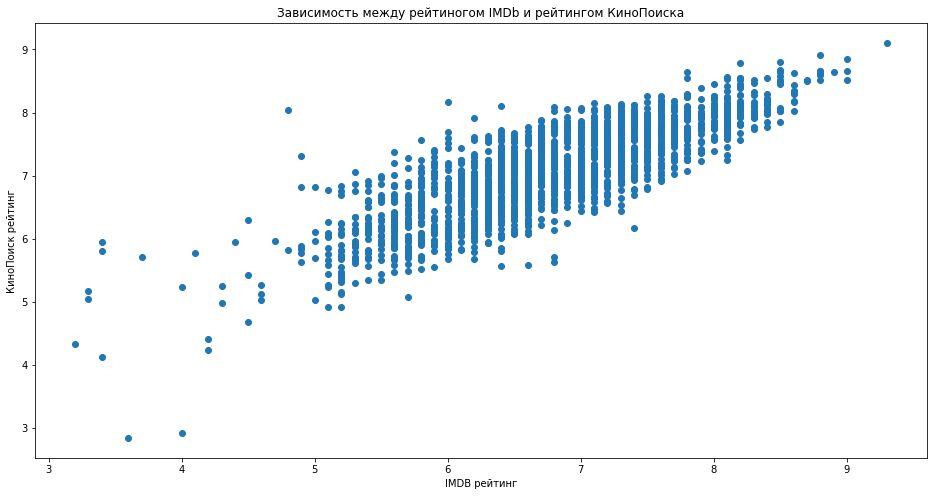

In [647]:
plt.figure(figsize=(16,8))
plt.scatter(df['imdb_rating'], df['ratingKP'])
plt.title('Зависимость между рейтиногом IMDb и рейтингом КиноПоиска')
plt.ylabel('КиноПоиск рейтинг')
plt.xlabel('IMDB рейтинг');

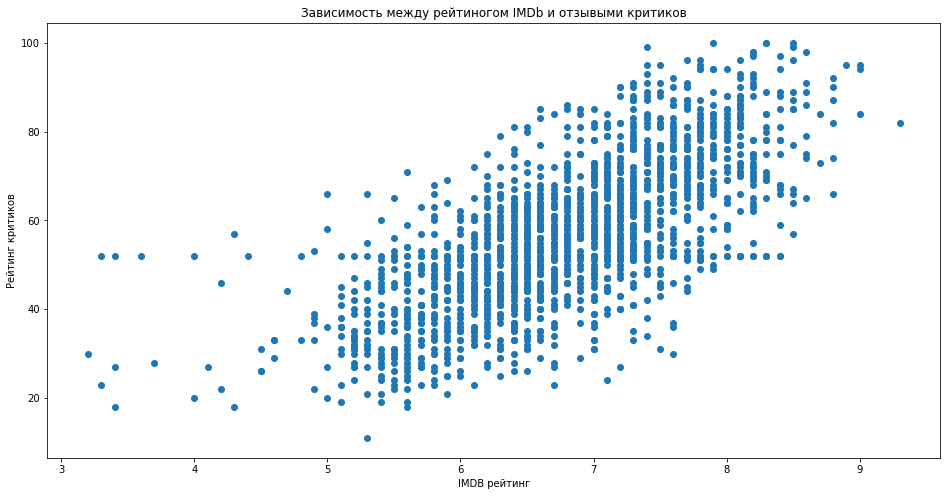

In [648]:
plt.figure(figsize=(16,8))
plt.scatter(df['imdb_rating'], df['metascore'])
plt.title('Зависимость между рейтиногом IMDb и отзывыми критиков')
plt.ylabel('Рейтинг критиков')
plt.xlabel('IMDB рейтинг');

Между этими величинами действительно наблюдается сильная положительная зависимость, что очевидно по смыслу

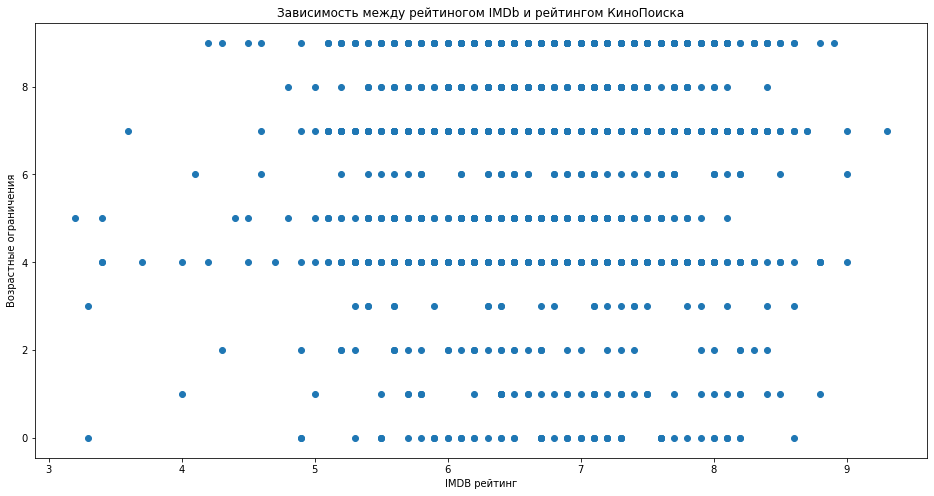

In [649]:
plt.figure(figsize=(16,8))
plt.scatter(df['imdb_rating'], df['certificate'])
plt.title('Зависимость между рейтиногом IMDb и рейтингом КиноПоиска')
plt.ylabel('Возрастные ограничения')
plt.xlabel('IMDB рейтинг');

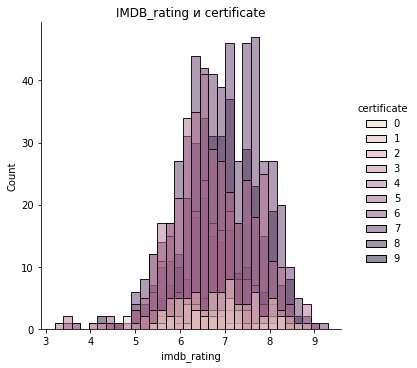

In [650]:
sns.displot(df, x="imdb_rating", hue="certificate")
plt.title('IMDB_rating и certificate')
plt.show()

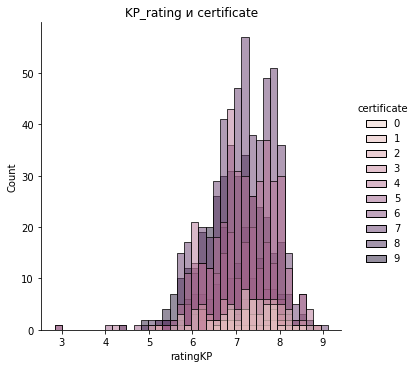

In [651]:
sns.displot(df, x="ratingKP", hue="certificate")
plt.title('KP_rating и certificate')
plt.show()

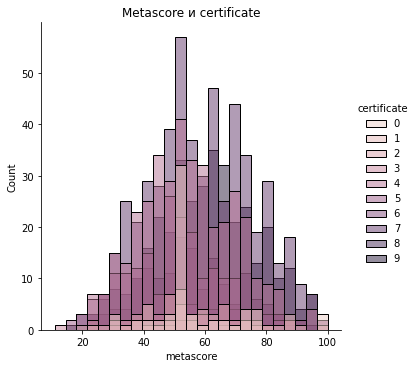

In [652]:
sns.displot(df, x="metascore", hue="certificate")
plt.title('Metascore и certificate')
plt.show()

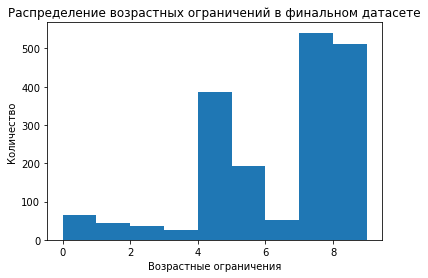

In [653]:
plt.hist(df['certificate'], bins=9)
plt.xlabel('Возрастные ограничения')
plt.ylabel('Количество')
plt.title('Распределение возрастных ограничений в финальном датасете');

Судя по графикам, появляется предположение, что у фильмов с более высоким возрастным ограничением рейтинг imdb и metascore выше. (Относительно KP_rating такое предположение не подтвержается графиком) Проверим данное предположение в качестве гипотизы в следующих пунктах

In [535]:
# Продолжение следует...

## Шаг 4:  Создание новых признаков

**Для этого пункта у нас есть следующая идея:**

Мы владеем информацией о двух актерах для каждого фильма. На наш взгляд, эта информация может значительно влиять на IMDb рейтинг и рейтинг КиноПоиска. Однако мы не можем никак использовать эти данные для построени модели машинного обучения, так как эти признаки категориальные и не подлежат кодированию из-за большого количества уникальных имен.

Мы имеем датафрейм с топ-1000 лучших актеров (с сайта IMDB, парсер написан в файле с парсерами). Мы ходим заменить имена всех актеров на их рейтинг в этом датафрейме. На наш взгляд этот новый признак может быть очень информативным.

Однако в связи с этой идеей у нас есть проблема: имена звезд в списке топ-1000 даны на английском языке, а в наших данных - на русском. Поэтому у нас могут возникнуть проблемы с переводом.

В случае удачной реализации данной идеи, мы хотим повторить такую операцию с именами режиссеров.

Кроме того, у нас есть идея создать новый признак 'выигрывал ли фильм оскар'. Но эта идея пока что только на этапе размышления

In [534]:
# Продолжение следует...

## Шаг 6:  Гипотезы

После шага 3: Визуализация у нас появилось две гипотезы для проверки:

- у фильмов с более высоким возрастным ограничением рейтинг imdb выше

- у фильмов с более высоким возрастным ограничением рейтинг metascore выше

Мы планируем проверить их в этом пункте

Кроме того, мы хотим проверить наши предположения о том, что

1. Фильмы, произведенные в США в среднем имеют более высокий рейтинг IMDb, чем фильмы, произведенные в России
2. Фильмы нестандартной длительности (слишком короткие или слишком длинные) имеют в среднем менее высокий рейтинг IMDB
3. Доля фильмов, имеющих IMDb рейтинг выше 8, меньше, чем доля фильмов, имеющих рейтинг Кинопоиска выше 8
4. Средний metascore фильмов с IMDb рейтингов выше 8 больше, чем фильмов с рейтингом КиноПоиска выше 8
5. Фильмы, выпущенные 'редкими' странами, в среднем имеют более низкий IMDb рейтинг, чем фильмы, выпущенные 'популярными' странами,

где 

    'редкие' - страны, которые имеют мало выпущенных фильмов
    
    'популярные' - стрны, имеющие много выпущенных фильмов

Однако эти гипотезы мы еще не проверяли путем визуализации. Для их проверки мы сначала планируем закодировать категориальные признаки подходящими способами

In [536]:
# Продолжение следует

## Шаг 7: Машинное обучение

В качестве целевой переменной мы планируем взять IMDb рейтинг или рейтинг КиноПоиска (какую из двух, мы еще не определились, может быть попробуем предсказывать обе)

Соответсвенно, задача, которую мы будем решать - задача регрессии

В качестве метрики для оценки качества будем использовать MSE, MAE или R2(возможно по ходу выполнения проекта поменяем метрику)

Модели, которые мы планируем использовать:

- линейная регрессия (с разной регуляризацией и без)
- kNN (с найденным на валидационной выборке оптимальным k)
- регрессионные деревья
- случайный лес
- градиентный бустинг

План работы для этого шага:
    
1. Закодировать все категориальные признаки логичным образом
2. Отмасштабировать все признаки (StandartScaler или MinMaxScaler)
3. Отобрать наиболее релевантные признаки (через sklearn.feature_selection) - не точно
4. Подобрать гиперпараметры для разных моделей
5. Обучить разные модели и сравнить их качество на валидационной выборке
6. Выбрать лучшую модель и получить ее качество на тестовой выборке